In [1]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils
from scipy import io
import numpy as np
from sklearn.cross_validation import train_test_split
import string
import os
import sys
import matplotlib.pyplot as plt
from keras_sequential_ascii import sequential_model_to_ascii_printout


import seaborn as sns
sns.set_style("white")

Using TensorFlow backend.
/home/ertadm/PycharmProjects/tryponet2/venv/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import progressbar
import cv2

def load_folder(folder):
    bar = progressbar.ProgressBar()
    images = []
    i = 0
    for file in bar(os.listdir(folder)):
        image = cv2.imread(os.path.join(folder, file))
        if(image is not None):
            image = cv2.resize(image, (resolution_x, resolution_y), interpolation=cv2.INTER_LINEAR)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            images.append(image)
        #if (i%10==0):
            #print (".", end="")
        #i+=1
    print ("")
    return np.array(images)

In [3]:
fobia_folder = "/home/ertadm/PycharmProjects/tryponet2/rips_old/data_train/reddit_sub_trypophobia"
normal_folder = "/home/ertadm/PycharmProjects/tryponet2/rips_old/data_train/reddit_sub_pics"
fobia_folder_val = "/home/ertadm/PycharmProjects/tryponet2/rips_old/data_valid/reddit_sub_trypophobia"
normal_folder_val = "/home/ertadm/PycharmProjects/tryponet2/rips_old/data_valid/reddit_sub_pics"
fobia_folder_load = "/mnt/trypophobic"
resolution_x = 250
resolution_y = 250
#fobia_images_load = load_folder(fobia_folder_load) /255.
normal_images = load_folder(normal_folder) /255.
normal_images_val = load_folder(normal_folder_val) /255.
fobia_images_val = load_folder(fobia_folder_val) /255.
fobia_images = load_folder(fobia_folder) /255.
#import random
#random.shuffle(fobia_images_load)
#fobia_images = fobia_images_load[:-120]
#fobia_images_val = fobia_images_load[-120:]
#del fobia_images_load

100% (848 of 848) |#######################| Elapsed Time: 0:01:05 Time: 0:01:05


100% (170 of 170) |#######################| Elapsed Time: 0:00:12 Time: 0:00:12
N/A% (0 of 150) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

100% (150 of 150) |#######################| Elapsed Time: 0:00:09 Time: 0:00:09
N/A% (0 of 712) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

100% (712 of 712) |#######################| Elapsed Time: 0:00:45 Time: 0:00:45


In [4]:
def image_to_X_Y(fobia_images, normal_images):
    X_train = [] 
    Y_train = [] # 1,0 -> fobia | 0,1 -> normal
    for img in fobia_images:
        X_train.append(img)
        Y_train.append([1,0])
    for img in normal_images:
        X_train.append(img)
        Y_train.append([0,1])
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    return X_train, Y_train

X_train, Y_train = image_to_X_Y(fobia_images, normal_images)
X_test, Y_test = image_to_X_Y(fobia_images_val, normal_images_val)

#X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=4)

In [5]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same',
          input_shape=(resolution_x, resolution_y, 3)))
#model.add(Convolution2D(8, 3, 3, border_mode='same'))
model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(GlobalAveragePooling2D())
#model.add(Flatten())
#model.add(Dropout(0.2))
for i in range(1):
    model.add(Dense(64))
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
#for i in range(1):
#    model.add(Dense(32))
#    model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 250, 250, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 250, 250, 16)      2320      
_________________________________________________________________
activation_1 (Activation)    (None, 250, 250, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 250, 250, 32)      4640      
_________________________________________________________________
activation_2 (Activation)    (None, 250, 250, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 64)      18496     
__________

In [8]:
history = model.fit(X_train, Y_train,
                    epochs=90,
                    batch_size=10,
                    validation_data=(X_test, Y_test))

Train on 1560 samples, validate on 320 samples
Epoch 1/90
1560/1560 [==============================] - 154s - loss: 0.6857 - acc: 0.5404 - val_loss: 0.6945 - val_acc: 0.4688
Epoch 2/90
 120/1560 [=>............................] - ETA: 129s - loss: 0.6944 - acc: 0.4167

KeyboardInterrupt: 

In [19]:
#model.save("model92p")

In [35]:
first_layer = model.layers[0]
# this is a placeholder tensor that will contain our generated images
input_img = first_layer.input

In [22]:
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x.transpose((2, 0, 1))
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((2, 1, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def drow_layer_opt(layer, filter_index=0):
    # build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer.output
    loss = K.mean(layer_output[:, filter_index, :, :])
    # compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]
    # normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])
    
    # we start from a gray image with some noise
    input_img_data = np.random.random((1, resolution_x, resolution_y, 3)) * 20 + 128.
    # run gradient ascent for 20 steps
    for i in range(50):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * 10
        
    img = input_img_data[0]
    img = deprocess_image(img)
    
    return img

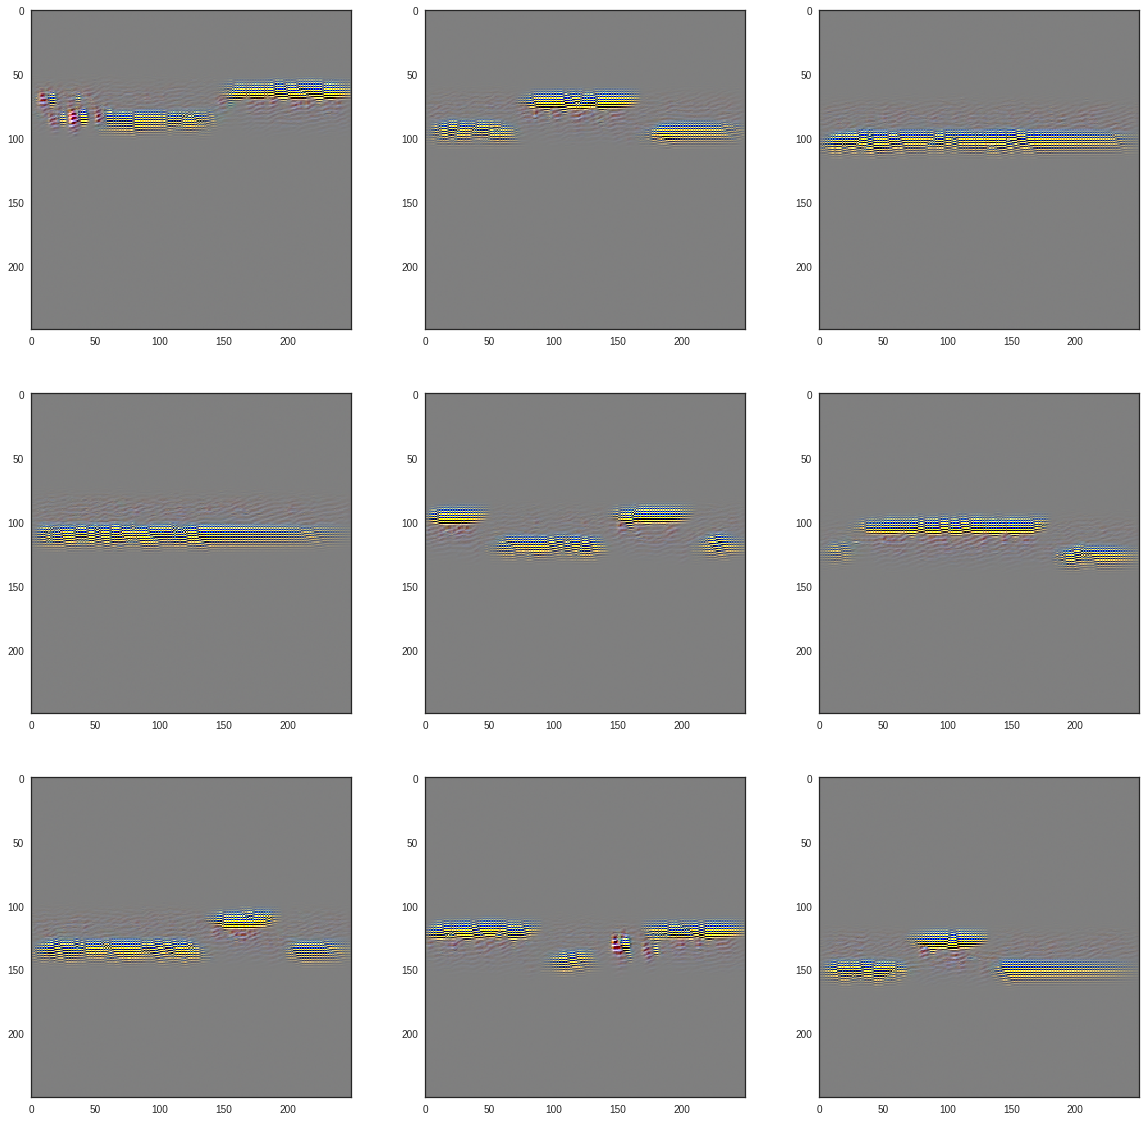

In [37]:
import matplotlib.pyplot as plt
#print(model.layers[13].shape)
plt.figure(figsize=(20,20))
for i in range(9,18):
    plt.subplot(3,3,(i%9)+1)
    plt.imshow(drow_layer_opt(model.layers[18],i))

In [30]:
len(model.layers)

27

In [31]:
def drow_layer_opt2(layer, filter_index=0):
    first_layer = model.layers[0]
    # this is a placeholder tensor that will contain our generated images
    input_img = first_layer.input
    # build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer.output
    loss = K.mean(layer_output[:, 0])
    # compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]
    # normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])
    
    # we start from a gray image with some noise
    input_img_data = np.random.random((1, resolution_x, resolution_y, 3)) * 20 + 128.
    # run gradient ascent for 20 steps
    for i in range(100):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * 0.5
        
    img = input_img_data[0]
    img = deprocess_image(img)
    
    return img

In [38]:
plt.figure(figsize=(20,20))
plt.imshow(drow_layer_opt2(model.layers[26]))

InvalidArgumentError: You must feed a value for placeholder tensor 'keras_learning_phase' with dtype bool
	 [[Node: keras_learning_phase = Placeholder[dtype=DT_BOOL, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: Mean_19/_923 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_365_Mean_19", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'keras_learning_phase', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-9079e973e5ac>", line 2, in <module>
    model = load_model("model92p")
  File "/usr/local/lib/python3.5/dist-packages/keras/models.py", line 140, in load_model
    model = model_from_config(model_config, custom_objects=custom_objects)
  File "/usr/local/lib/python3.5/dist-packages/keras/models.py", line 190, in model_from_config
    return layer_from_config(config, custom_objects=custom_objects)
  File "/usr/local/lib/python3.5/dist-packages/keras/utils/layer_utils.py", line 40, in layer_from_config
    return layer_class.from_config(config['config'])
  File "/usr/local/lib/python3.5/dist-packages/keras/models.py", line 1080, in from_config
    model.add(layer)
  File "/usr/local/lib/python3.5/dist-packages/keras/models.py", line 327, in add
    output_tensor = layer(self.outputs[0])
  File "/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py", line 569, in __call__
    self.add_inbound_node(inbound_layers, node_indices, tensor_indices)
  File "/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py", line 632, in add_inbound_node
    Node.create_node(self, inbound_layers, node_indices, tensor_indices)
  File "/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py", line 164, in create_node
    output_tensors = to_list(outbound_layer.call(input_tensors[0], mask=input_masks[0]))
  File "/usr/local/lib/python3.5/dist-packages/keras/layers/core.py", line 90, in call
    x = K.in_train_phase(K.dropout(x, self.p, noise_shape), x)
  File "/usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py", line 1877, in in_train_phase
    if learning_phase() is 1:
  File "/usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py", line 73, in learning_phase
    name='keras_learning_phase')
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/array_ops.py", line 1587, in placeholder
    name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 2043, in _placeholder
    name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'keras_learning_phase' with dtype bool
	 [[Node: keras_learning_phase = Placeholder[dtype=DT_BOOL, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: Mean_19/_923 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_365_Mean_19", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [218]:
def draw_layer_dense2(layer, filter_index=0):
    # build a loss function that maximizes the activation
    layer_output = layer.output
    loss = K.mean(layer_output)
    # compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]
    # normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])
    
    # we start from a gray image with some noise
    input_img_data = np.random.random((1, resolution_x, resolution_y, 3)) * 20 + 128.
    # run gradient ascent for 20 steps
    for i in range(100):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * 0.5
        
    img = input_img_data[0]
    img = deprocess_image(img)
    return img

In [ ]:
from vis.optimizer import Optimizer
from vis.losses import ActivationMaximization
from vis.regularizers import TotalVariation, LPNorm

output_class = [0]

losses = [
    (ActivationMaximization(model.layers[27], output_class), 2),
    (LPNorm(model.input), 1),
    (TotalVariation(model.input), 1)
]
opt = Optimizer(model.input, losses)

opt.minimize(max_iter=500, verbose=True,
             progress_gif_path='opt_progress')

In [ ]:
from vis.visualization import visualize_activation

visualize_activation(model, model.layers[27], filter_indices=[0,1], show_filter_idx_text="asd", max_iter=500)

In [3]:

from keras.models import load_model
model = load_model("/home/ertadm/PycharmProjects/tryponet2/model_92p_wyciete.h5")


/home/ertadm/PycharmProjects/tryponet2/venv/lib/python3.6/site-packages/keras/engine/topology.py:1252: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(trainable=True, batch_input_shape=[None, 250..., name="convolution2d_21", activation="linear", input_dtype="float32", activity_regularizer=None, kernel_size=(3, 3), filters=16, strides=[1, 1], padding="same", data_format="channels_last", kernel_initializer="glorot_uniform", kernel_regularizer=None, bias_regularizer=None, kernel_constraint=None, bias_constraint=None, use_bias=True)`
  return cls(**config)
/home/ertadm/PycharmProjects/tryponet2/venv/lib/python3.6/site-packages/keras/engine/topology.py:1252: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(trainable=True, name="convolution2d_22", activation="linear", activity_regularizer=None, kernel_size=(3, 3), filters=16, strides=[1, 1], padding="same", data_format="channels_last", kernel_initializer="glorot_uniform", kernel_regularizer=None, bias_reg

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convolution2d_21 (Conv2D)    (None, 250, 250, 16)      448       
_________________________________________________________________
convolution2d_22 (Conv2D)    (None, 250, 250, 16)      2320      
_________________________________________________________________
activation_21 (Activation)   (None, 250, 250, 16)      0         
_________________________________________________________________
convolution2d_23 (Conv2D)    (None, 250, 250, 32)      4640      
_________________________________________________________________
activation_22 (Activation)   (None, 250, 250, 32)      0         
_________________________________________________________________
maxpooling2d_7 (MaxPooling2D (None, 125, 125, 32)      0         
_________________________________________________________________
convolution2d_24 (Conv2D)    (None, 125, 125, 64)      18496     
__________

In [ ]:
sequential_model_to_ascii_printout(model)

In [8]:
def show_score(model):
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test correctness:', score[1])
    
def show_bledy_przykladowe(model, it=0):
    predicted_classes = model.predict_classes(X_test)
    y_test=Y_test.argmax(1)
    incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
    plt.figure(figsize=(20,20))
    for i, incorrect in enumerate(incorrect_indices[it:it+9]):
        plt.subplot(3,3,i%9+1)
        plt.imshow(X_test[incorrect].reshape(resolution_x,resolution_y, 3), cmap='gray', interpolation='none')
        plt.title("not {}, {}".format(predicted_classes[incorrect], y_test[incorrect]))

Test score: 1.16387432888
Test correctness: 0.65625
320/320 [==============================] - 8s     


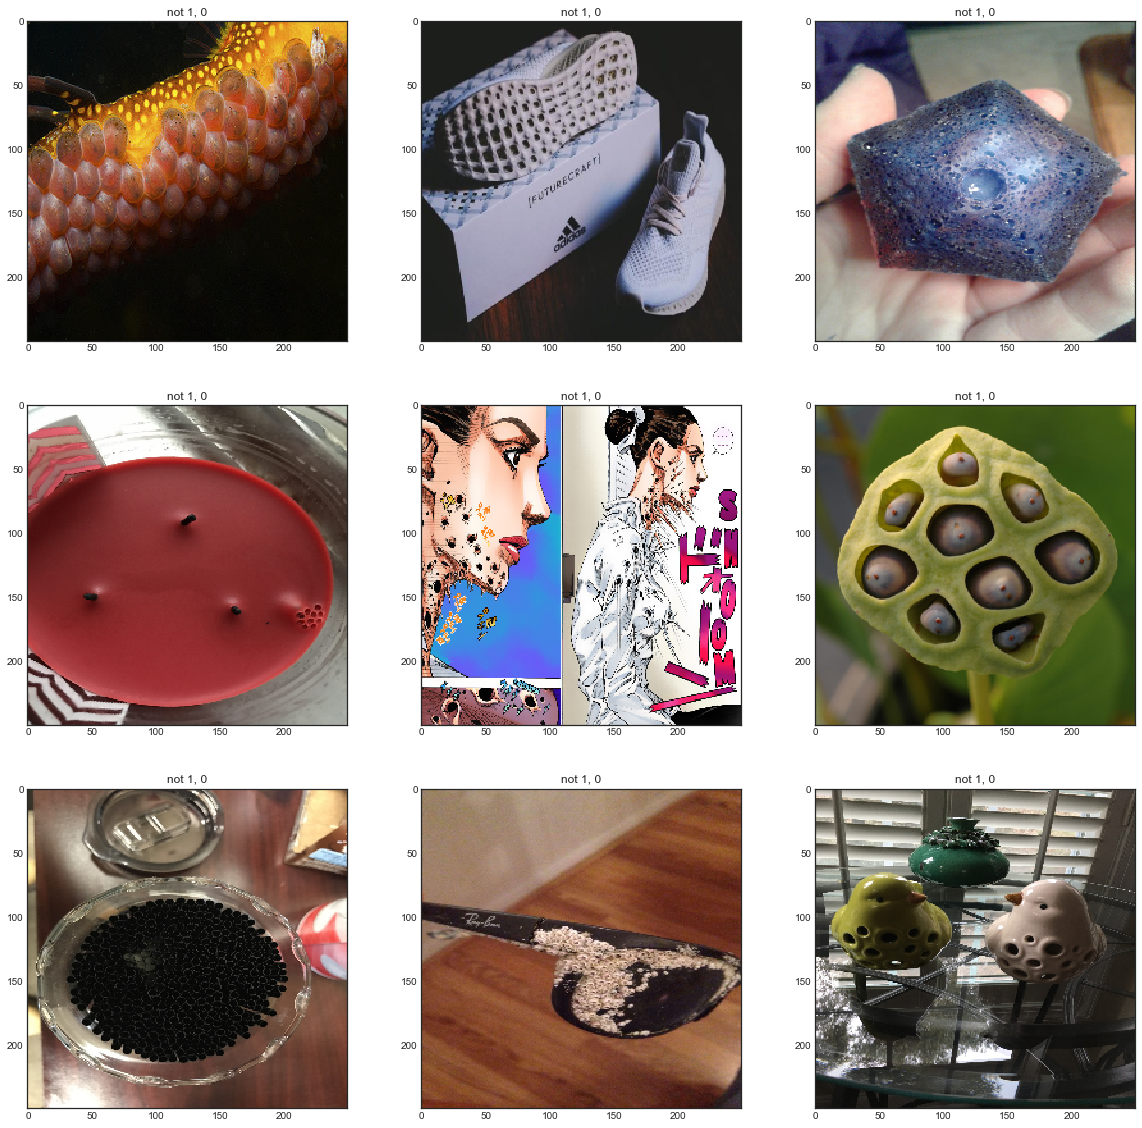

In [9]:
show_score(model)
show_bledy_przykladowe(model,9)

In [32]:
from keras.models import load_model
model = load_model("model92p")

(2346, 2158, 3)


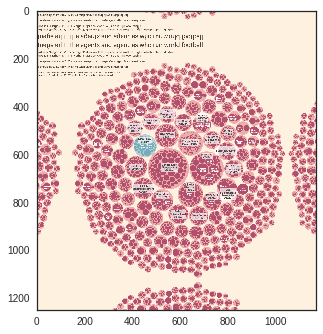

In [20]:
def returnCrop(img, pos_x, pos_y, window_size=resolution_x):
    return img[pos_x:pos_x+window_size, pos_y:pos_y+window_size]


def image_zamal(file):
    image = cv2.cvtColor(cv2.imread(os.path.join(normal_folder, file)), cv2.COLOR_BGR2RGB)
    #print(image.shape)
    scale = 1000/(max(image.shape[0], image.shape[1]))
    image = cv2.resize(image, (int(image.shape[1]*scale),int(image.shape[0]*scale)))
    image = cv2.copyMakeBorder(image,resolution_x//2,resolution_x//2,resolution_x//2,resolution_x//2,cv2.BORDER_REFLECT_101,value=0)
    img_orig = image.copy()
    #plt.imshow(image)

    image = img_orig.copy()
    bar = progressbar.ProgressBar()
    for x in range(0,image.shape[0]-resolution_x,20):
        for y in range(0,image.shape[1]-resolution_x,20):
            pred = model.predict_proba(np.expand_dims(returnCrop(img_orig,x,y), axis=0), batch_size=1, verbose=0)[0][0]
            if (pred>0.8):
                overlay = image.copy()
                rozm = 100
                cv2.rectangle(overlay, (y+resolution_x//2-rozm, x+resolution_x//2-rozm), (y+resolution_x//2+rozm-1,x+resolution_x//2+rozm-1),0,-1)
                opacity = 0.05*(pred)
                cv2.addWeighted(overlay, opacity, image, 1 - opacity, 0, image)
    image_cr = image[resolution_x//2:image.shape[0]-resolution_x//2,resolution_x//2:image.shape[1]-resolution_x//2]
    return image_cr
#file = os.listdir(fobia_folder)[5]
bar1 = progressbar.ProgressBar()
for file in bar1(os.listdir(normal_folder)):
    image_cr = image_zamal(file)
    cv2.imwrite("zamal/"+"".join(file.split(".")[:-1])+"-zamal.jpg", cv2.cvtColor(image_cr, cv2.COLOR_RGB2BGR))
#plt.figure(figsize=(20,20))
#plt.imshow(image_cr)

 13% (114 of 848) |###                     | Elapsed Time: 0:46:10 ETA: 5:08:08

KeyboardInterrupt: 

In [231]:
model.predict_proba(np.expand_dims(returnCrop(img_orig,300,0), axis=0), batch_size=1, verbose=0)[0][0]

1.0

In [13]:
cv2.imwrite("zamal/"+"".join(file.split(".")[:-1])+"-zamal.jpg", cv2.cvtColor(image_cr, cv2.COLOR_RGB2BGR))

True

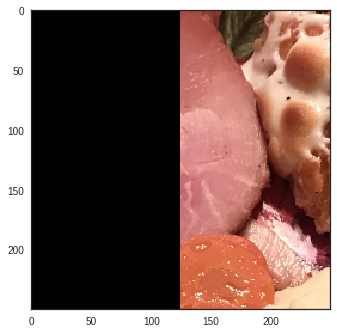

In [232]:
#overlay = img_orig.copy()
#cv2.rectangle(overlay, (300+resolution_x//2-25,0+resolution_x//2-25), (300+resolution_x//2+25,0+resolution_x//2+25),0,-1)
plt.imshow(returnCrop(img_orig,300,0))

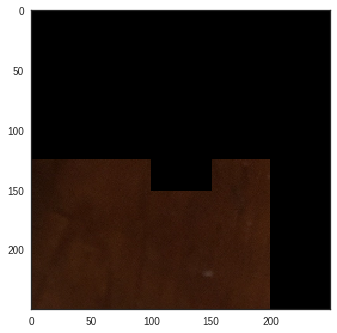

In [220]:
plt.imshow(returnCrop(overlay,0,300))

In [125]:
predicted_classes = model.predict_classes(fobia_images)

592/592 [==============================] - 9s      


In [126]:
predicted_classes = model.predict_classes()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0,

In [147]:
image = cv2.cvtColor(cv2.imread(os.path.join(fobia_folder, os.listdir(fobia_folder)[0])), cv2.COLOR_BGR2RGB)
im2 = cv2.resize(image,(250,250))
print(model.predict_proba(np.expand_dims(im2, axis=0), batch_size=1))
print(model.predict_classes(np.expand_dims(im2, axis=0), batch_size=1))

1/1 [==============================] - 0s
[[ 0.  1.]]
1/1 [==============================] - 0s
[1]


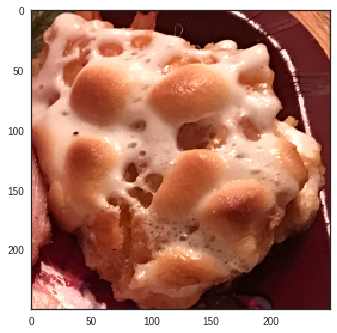

In [142]:
plt.imshow(im2)

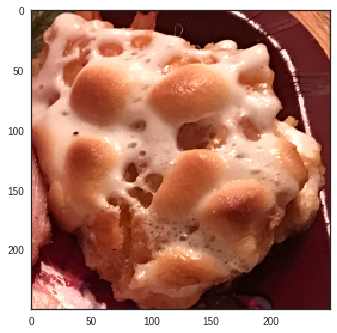

In [139]:
plt.imshow(fobia_images[0])

In [29]:
plt.figure(figsize=(20,20))
plt.imshow(drow_layer_opt2(model.layers[-1]))

InvalidArgumentError: You must feed a value for placeholder tensor 'keras_learning_phase' with dtype bool
	 [[Node: keras_learning_phase = Placeholder[dtype=DT_BOOL, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: Mean_6/_421 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_234_Mean_6", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'keras_learning_phase', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-9079e973e5ac>", line 2, in <module>
    model = load_model("model92p")
  File "/usr/local/lib/python3.5/dist-packages/keras/models.py", line 140, in load_model
    model = model_from_config(model_config, custom_objects=custom_objects)
  File "/usr/local/lib/python3.5/dist-packages/keras/models.py", line 190, in model_from_config
    return layer_from_config(config, custom_objects=custom_objects)
  File "/usr/local/lib/python3.5/dist-packages/keras/utils/layer_utils.py", line 40, in layer_from_config
    return layer_class.from_config(config['config'])
  File "/usr/local/lib/python3.5/dist-packages/keras/models.py", line 1080, in from_config
    model.add(layer)
  File "/usr/local/lib/python3.5/dist-packages/keras/models.py", line 327, in add
    output_tensor = layer(self.outputs[0])
  File "/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py", line 569, in __call__
    self.add_inbound_node(inbound_layers, node_indices, tensor_indices)
  File "/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py", line 632, in add_inbound_node
    Node.create_node(self, inbound_layers, node_indices, tensor_indices)
  File "/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py", line 164, in create_node
    output_tensors = to_list(outbound_layer.call(input_tensors[0], mask=input_masks[0]))
  File "/usr/local/lib/python3.5/dist-packages/keras/layers/core.py", line 90, in call
    x = K.in_train_phase(K.dropout(x, self.p, noise_shape), x)
  File "/usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py", line 1877, in in_train_phase
    if learning_phase() is 1:
  File "/usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py", line 73, in learning_phase
    name='keras_learning_phase')
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/array_ops.py", line 1587, in placeholder
    name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 2043, in _placeholder
    name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'keras_learning_phase' with dtype bool
	 [[Node: keras_learning_phase = Placeholder[dtype=DT_BOOL, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: Mean_6/_421 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_234_Mean_6", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
